# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time 
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy 
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities



['dikson',
 'saldanha',
 'uyar',
 'narsaq',
 'bluff',
 'changde',
 'butaritari',
 'bykovo',
 'mahebourg',
 'kilindoni',
 'pasighat',
 'half moon bay',
 'kosh-agach',
 'sur',
 'tura',
 'jamestown',
 'northam',
 'puerto ayora',
 'puruliya',
 'pierre',
 'qaanaaq',
 'ushuaia',
 'dali',
 'zhigansk',
 'lebu',
 'port hardy',
 'cam ranh',
 'krasnoselkup',
 'tuatapere',
 'georgetown',
 'rikitea',
 'noumea',
 'bowen',
 'warmbad',
 'puerto suarez',
 'hilo',
 'chuy',
 'lavrentiya',
 'hami',
 'artyk',
 'mar del plata',
 'iberia',
 'cap malheureux',
 'okha',
 'khatanga',
 'punta arenas',
 'malappuram',
 'kahului',
 'albany',
 'ivankiv',
 'castro',
 'tuktoyaktuk',
 'vaini',
 'nizhneyansk',
 'tiksi',
 'busselton',
 'san quintin',
 'saskylakh',
 'hermanus',
 'tsihombe',
 'belushya guba',
 'la ronge',
 'la reforma',
 'meulaboh',
 'saint-philippe',
 'berbera',
 'faanui',
 'fortuna',
 'wuhu',
 'barawe',
 'nanortalik',
 'bambous virieux',
 'mataura',
 'martapura',
 'new norfolk',
 'oum hadjer',
 'san patri

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url="http://api.openweathermap.org/data/2.5/weather?"
units='imperial'
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='




In [5]:
#create lists to make dataframe
city_list=[]
temp=[]
humidity=[]
wind=[]
clouds=[]
lat=[]
lng=[]
country=[]
date=[]



In [10]:
#populate lists using API requests
counter = 0
set_counter = 1

for i in cities:
    try:
        response = requests.get(base_url + i.replace(" ","&")).json()
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        if counter > 48:
            counter = 1
            set_counter += 1
            city_list.append(i)
        else:
            counter += 1
            city_list.append(i)
        print(f"City Record # : {counter}| {i}")
    except:
        print("City not found....")
    






City Record # : 1| dikson
City Record # : 2| saldanha
City Record # : 3| uyar
City Record # : 4| narsaq
City Record # : 5| bluff
City Record # : 6| changde
City Record # : 7| butaritari
City Record # : 8| bykovo
City Record # : 9| mahebourg
City Record # : 10| kilindoni
City Record # : 11| pasighat
City Record # : 12| half moon bay
City Record # : 13| kosh-agach
City Record # : 14| sur
City Record # : 15| tura
City Record # : 16| jamestown
City Record # : 17| northam
City Record # : 18| puerto ayora
City Record # : 19| puruliya
City Record # : 20| pierre
City Record # : 21| qaanaaq
City Record # : 22| ushuaia
City Record # : 23| dali
City Record # : 24| zhigansk
City Record # : 25| lebu
City Record # : 26| port hardy
City Record # : 27| cam ranh
City Record # : 28| krasnoselkup
City Record # : 29| tuatapere
City Record # : 30| georgetown
City Record # : 31| rikitea
City Record # : 32| noumea
City Record # : 33| bowen
City Record # : 34| warmbad
City Record # : 35| puerto suarez
City Re

City Record # : 17| guerrero negro
City Record # : 18| burnie
City Record # : 19| kenai
City Record # : 20| kungurtug
City Record # : 21| luau
City Record # : 22| nalut
City not found....
City Record # : 23| bay roberts
City Record # : 24| pijijiapan
City Record # : 25| liverpool
City Record # : 26| gasa
City Record # : 27| praia da vitoria
City Record # : 28| mafinga
City not found....
City Record # : 29| sambava
City Record # : 30| aksarka
City Record # : 31| qui nhon
City Record # : 32| salinopolis
City Record # : 33| darhan
City Record # : 34| adrar
City Record # : 35| atar
City Record # : 36| hella
City not found....
City not found....
City Record # : 37| mozarlandia
City Record # : 38| barrow
City Record # : 39| laguna
City Record # : 40| alice springs
City Record # : 41| mantua
City Record # : 42| villa carlos paz
City Record # : 43| cayenne
City Record # : 44| almaznyy
City Record # : 45| phalaborwa
City Record # : 46| san borja
City Record # : 47| khasan
City not found....
Cit

City Record # : 40| matamoros
City Record # : 41| mahinog
City Record # : 42| tulun
City Record # : 43| juegang
City Record # : 44| sept-iles
City not found....
City Record # : 45| maceio
City Record # : 46| constantine
City Record # : 47| barma
City Record # : 48| abu kamal
City Record # : 49| nishihara
City Record # : 1| camacha
City Record # : 2| alta floresta
City Record # : 3| sinnamary
City Record # : 4| yulara
City Record # : 5| bambanglipuro
City Record # : 6| avare
City Record # : 7| puno
City Record # : 8| fetsund
City Record # : 9| cairns
City Record # : 10| besancon
City not found....
City Record # : 11| panjakent
City Record # : 12| carutapera
City not found....
City Record # : 13| ospitaletto
City Record # : 14| touros
City not found....
City Record # : 15| belaya gora
City Record # : 16| ngorongoro
City Record # : 17| elat
City Record # : 18| shaunavon
City Record # : 19| posse
City Record # : 20| fallon
City Record # : 21| lixourion
City Record # : 22| del rio
City not 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# create dataframe from created lists

weather_df=pd.DataFrame({"City":city_list,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":temp,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":wind,
    "Country":country,
    "Date":date,   
})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,9.05,83,100,7.54,RU,1635486347
1,saldanha,-33.0117,17.9442,60.85,89,77,10.74,ZA,1635486284
2,uyar,55.8100,94.3153,37.56,39,89,7.25,RU,1635486458
3,narsaq,60.9167,-46.0500,28.62,75,100,2.13,GL,1635486459
4,bluff,-46.6000,168.3333,57.63,84,51,7.36,NZ,1635486307
...,...,...,...,...,...,...,...,...,...
1149,lekoni,-1.5843,14.2591,73.90,85,97,4.12,GA,1635486718
1150,acarau,-2.8856,-40.1200,79.21,75,75,11.92,BR,1635486719
1151,canutama,-6.5339,-64.3831,72.14,98,96,2.46,BR,1635486719
1152,bilibino,68.0546,166.4372,-17.99,94,58,3.94,RU,1635486720


In [13]:
#create csv from dataframe

weather_df.to_csv('weatherpy.csv', encoding = 'utf-8',index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
weather_df.Date = time.strftime("%m/%d/%Y")
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,9.05,83,100,7.54,RU,10/28/2021
1,saldanha,-33.0117,17.9442,60.85,89,77,10.74,ZA,10/28/2021
2,uyar,55.8100,94.3153,37.56,39,89,7.25,RU,10/28/2021
3,narsaq,60.9167,-46.0500,28.62,75,100,2.13,GL,10/28/2021
4,bluff,-46.6000,168.3333,57.63,84,51,7.36,NZ,10/28/2021


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

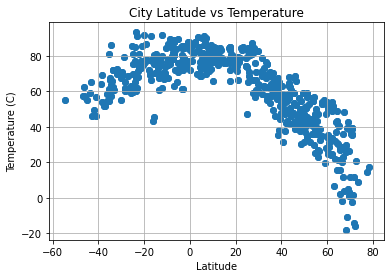

In [35]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

#save image of scatter plot created
plt.savefig("Latitude_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

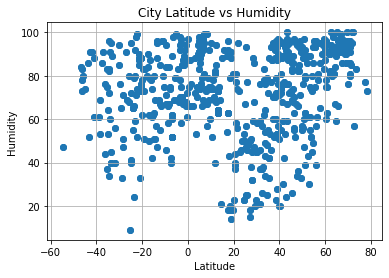

In [32]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save image of scatter plot created
plt.savefig("Latitude_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

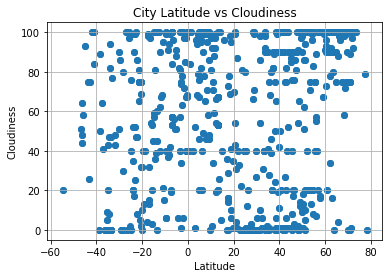

In [34]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save image of scatter plot created
plt.savefig("Latitude_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

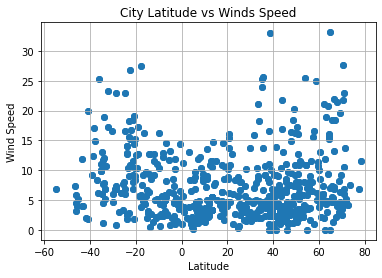

In [38]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")
plt.title("City Latitude vs Winds Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save image of scatter plot created
plt.savefig("Latitude_Wind Speed.png")

plt.show()

## Linear Regression

In [41]:
#extract information for northern and southern hemisphere
north_hemi_df = weather_df.loc[(weather_df['Lat']>0)]
south_hemi_df = weather_df.loc[(weather_df['Lat']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
type(north_hemi_df['Lat'])

pandas.core.series.Series

Regression line equation is: y =-0.95x + 92.25.
The r-squared is: -0.877109388995122


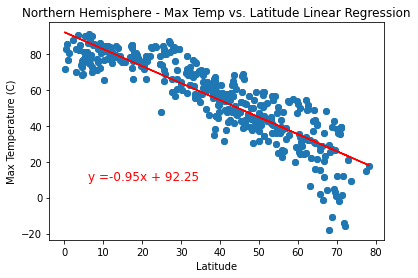

In [48]:
x_values=north_hemi_df['Lat']
y_values=north_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("Linregress_North_Hemisphere_MaxTemp_Latitude.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y =0.51x + 82.39.
The r-squared is: 0.6183725539350534


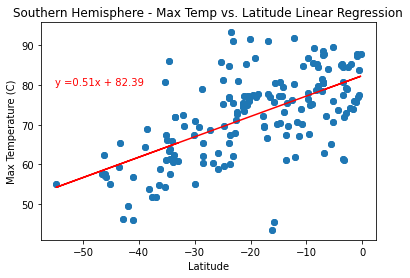

In [60]:
x_values=south_hemi_df['Lat']
y_values=south_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-55,80),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("Linregress_South_Hemisphere_MaxTemp_Latitude.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =0.26x + 61.77.
The r-squared is: 0.24871284644350888


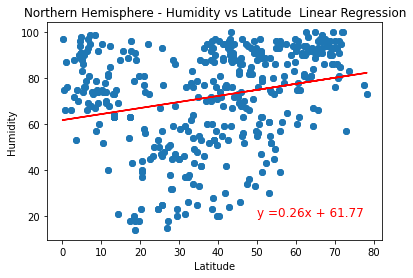

In [66]:
x_values=north_hemi_df['Lat']
y_values=north_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs Latitude  Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("Linregress_North_Hemisphere_Humidity_Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =0.14x + 73.99.
The r-squared is: 0.10393551733287291


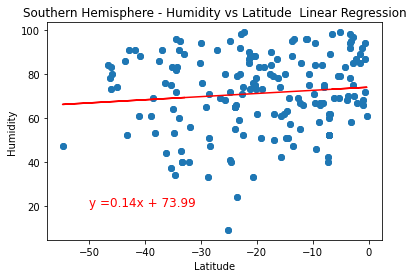

In [67]:
x_values=south_hemi_df['Lat']
y_values=south_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs Latitude  Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("Linregress_South_Hemisphere_Humidity_Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =0.26x + 47.2.
The r-squared is: 0.13700946189483368


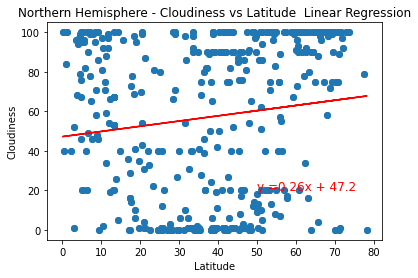

In [68]:
x_values=north_hemi_df['Lat']
y_values=north_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs Latitude  Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("Linregress_North_Hemi_Cloudiness_Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =0.57x + 63.95.
The r-squared is: 0.2183310083162563


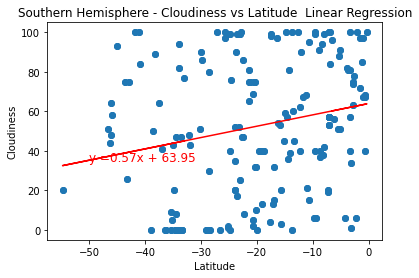

In [71]:
x_values=south_hemi_df['Lat']
y_values=south_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-50,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs Latitude  Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("Linregress_South_Hemi_Cloudiness_Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =0.06x + 4.51.
The r-squared is: 0.22222517844087175


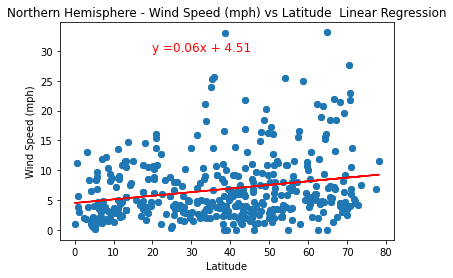

In [74]:
x_values=north_hemi_df['Lat']
y_values=north_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(20,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs Latitude  Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("Linregress_North_Hemi_Wind Speed_Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =-0.1x + 6.27.
The r-squared is: -0.23720988332793136


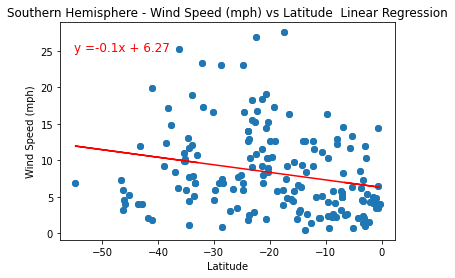

In [76]:
x_values=south_hemi_df['Lat']
y_values=south_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-55,25),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs Latitude  Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("Linregress_South_Hemi_Wind Speed_Latitude.png")

# # Analysis
1. When looking at the city data vs the temperature, the highest temperatures are observed closer to a latitude of 0 (the equator). The further away the city is from the equator, the temperature drops.
2. There appears to be no obvious trends between humidity vs latitude,  cloudiness vs latitude, and windspeed vs cloudiness.
3. Analysis of trends between Nothern and Souther Hemispheres
    a. Max Temp vs Latitude: The northern hemisphere has a strong negative slope showing that the further the city is from the equator, the lower the temperature becomes. The southern hemisphere has this same trend in the positive direction.
    b. Humidity vs Latitude: there is no clear trend between the humidity and latitude between each hemisphere
    c. Cloudiness vs Latitude: there is a slight trend in the observation of cloudiness for both hemisphere. The northern hemisphere slightly trends away from the equator while the southern hemisphere trends towards the equator.
    d. Wind Speed vs Latitude: there is no clear trend between the humidity and latitude between each hemisphere

       